**Thinkful - Challenge 2.1.8 - Preparing a Dataset for Modeling**

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

**Outcome Variable:**
Adoptibility of dogs

**Other variables**

1. Categorical - breed
2. Categorical - sex and spay/neuter status
3. Categorical - outcome (transfer, euthanasia, adoption, partner)
4. Continuous - date of birth
5. Continuous - date of outcome

**Ten new features**
1. Sex (pie chart)
2. Spay/neuter status (pie chart)
3. Age upon outcome (histogram)
4. Bully breed (pie chart)
5. Avg age vs outcome for bully and non-bully breeds (boxplots)
6. Total counts vs outcome for bully and non-bully breeds (bar plot)
7. Total counts vs time of year for all outcomes for bully breeds (bar plot)
8. Total counts vs time of year for all outcomes for non-bully breeds (bar plot)
9. Age of outcome vs time of year (scatter plot)
10. Total counts vs age for all outcomes for bully breeds (bar plot)

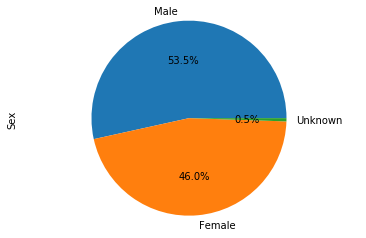

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import datetime
from datetime import date

df = pd.read_csv('aac_shelter_outcomes2.csv', encoding='latin1')

sex_upon_outcome = df['sex_upon_outcome']         
sex = []
for i in range(len(sex_upon_outcome)):
    try:
        if re.search('Male' , sex_upon_outcome[i]):
            sex.append('Male')
        elif re.search('Female' , sex_upon_outcome[i]):
            sex.append('Female')
        else:
            sex.append('Unknown')
    except TypeError:
        sex.append('TypeError')

#Append subject list to dataframe and output counts and avg cost by subject
df['Sex'] = pd.Series(sex, index=df.index)
df['Sex'].value_counts().plot(kind='pie',autopct='%1.01f%%')
plt.axis('equal')
plt.show()

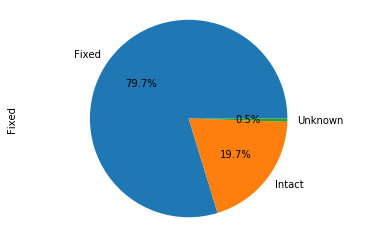

In [2]:
fixed = []
for i in range(len(sex_upon_outcome)):
    try:
        if (re.search('Intact' , sex_upon_outcome[i])):
            fixed.append('Intact')
        elif ((re.search('Spayed' , sex_upon_outcome[i]))or
              (re.search('Neutered' , sex_upon_outcome[i]))):
            fixed.append('Fixed')
        else:
            fixed.append('Unknown')   
    except TypeError:
        fixed.append('TypeError')

df['Fixed'] = pd.Series(fixed, index=df.index)
df['Fixed'].value_counts().plot(kind='pie',autopct='%1.01f%%')
plt.axis('equal')
plt.show()

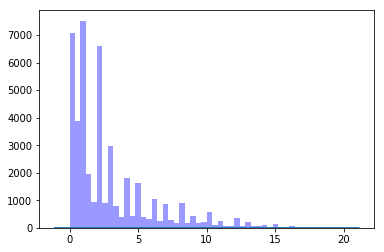

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import datetime
from datetime import date

df = pd.read_csv('aac_shelter_outcomes2.csv', encoding='latin1')

DOB = df['date_of_birth']
date_of_outcome = df['datetime']
age_at_outcome = []
for i in range(len(DOB)):
    DOB[i] = datetime.datetime.strptime(DOB[i], "%Y-%m-%dT%H:%M:%S")
    date_of_outcome[i] = datetime.datetime.strptime(date_of_outcome[i], "%Y-%m-%dT%H:%M:%S")
    age_at_outcome.append(abs((date_of_outcome[i] - DOB[i]).days))

df['Age at Outcome'] = pd.Series(age_at_outcome, index=df.index)
sns.distplot(age_at_outcome)
plt.show()

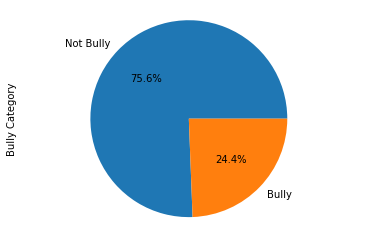

In [8]:
breed = df['breed']
outcome_type = df['outcome_type']
dogbreed_bully = []
for i in range(len(breed)):
    if ((re.search('Staff' , breed[i]))or
        (re.search('Boston' , breed[i]))or
        (re.search('Mastiff' , breed[i]))or
        (re.search('Rott' , breed[i]))or
        (re.search('Boxer' , breed[i]))or
        (re.search('Bull' , breed[i]))):
        dogbreed_bully.append('Bully')
    else:
        dogbreed_bully.append('Not Bully')
        
df['Bully Category'] = pd.Series(dogbreed_bully, index=df.index)
df['Bully Category'].value_counts().plot(kind='pie',autopct='%1.01f%%')
plt.axis('equal')
plt.show()

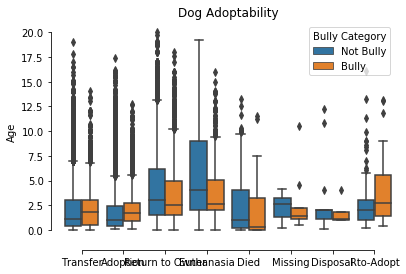

In [9]:
# Comparing groups using boxplots.
ax = sns.boxplot(x=outcome_type,y='Age at Outcome',hue='Bully Category',data=df)  
plt.title('Dog Adoptability')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Age')
plt.show()

In [17]:
import seaborn as sns
sns.set(style="whitegrid")

outcome_type = df['outcome_type']
outcome_counts = outcome_type.value_counts()

# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x='outcome_type', y=outcome_counts, hue="Bully Category", data=df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Counts")

IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 9518